## Simple detection mechanism

In [ ]:
from ultralytics import YOLO
import cv2

# Carregar modelo pré-treinado (pode trocar pelo seu)
model = YOLO("yolo11n.pt")

# Abrir a webcam (0 = webcam padrão, 1 se tiver mais de uma)
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Rodar inferência no frame
    results = model(frame)

    # Desenhar as anotações (caixas, labels etc.)
    annotated_frame = results[0].plot()

    # Mostrar na tela
    cv2.imshow("YOLO Webcam", annotated_frame)

    # Sair com a tecla 'q'
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()


: 

![bottle_exemple.png](bottle_exemple.png)

In [ ]:
import numpy as np
import cv2
from ultralytics import YOLO

class Frame:
    def __init__(self,frame:np.array = None) -> None:
        self.frame = frame
    
    def fromPath(self,path):
        self.frame = cv2.imread(path)
        return self
    
    def get(self):
        return self.frame

class Position:
    def __init__(self,x_axis:float,y_axis:float,z_axis:float,rotation:float,inclination:float) -> None:
        self.x_axis = x_axis
        self.y_axis = y_axis
        self.z_axis = z_axis
        self.rotation = rotation
        self.inclination = inclination

class Camera:
    def __init__(self,position:Position,height:float,wight:float,model:YOLO) -> None:
        self.position = position
        self.height = height
        self.wight = wight
        self.model = model

    def get_results(self,input:Frame):
        result = self.model(input.get())
        classes = result.boxes.cls.cpu().numpy().astype(int)
        boxes = result.boxes.xyxy.cpu().numpy()
        pessoas = []
        for idx, box in enumerate(boxes):
            # apenas pessoas
            if classes[idx] == 0:
                x1, y1, x2, y2 = map(int, box)
                center_x = int((x1 + x2) / 2)
                center_y = int((y1 + y2) / 2)
                pessoas.append((center_x, center_y))
        return {
            'results':result,
            'position':self.position,
            'centroids':pessoas

        }

class Environment:
    def __init__(self,cameras:list) -> None:
        self.cameras = cameras
        self.results = None
    def Iterate(self):
        self.results =  [camera.get_results() for camera in self.cameras]
    def calculate_points(self):
        ...
    def plot(self):
        self.Iterate()
        for result in self.results:
            


        


def main():
    print('Beginning...')
    frame_camera_a = Frame().fromPath('person_teste/cam_a.jpeg')
    frame_camera_b = Frame().fromPath('person_teste/cam_b.jpeg')
    positionA = Position(
        x_axis=5,
        y_axis=4,
        z_axis=0,
        rotation=90,        
        inclination=0,
    )
    positionB = Position(
        x_axis=10,
        y_axis=11,
        z_axis=0,
        rotation=180,        
        inclination=0,
    )
    cameraA = Camera(
        position=positionA,
        height=1200,
        wight=1600,
        model='yolo11n.pt'
        )
    cameraB = Camera(
        position=positionB,
        height=1200,
        wight=1600,
        model='yolo11n.pt'
        )
    environment = Environment(
        cameras = [cameraA,cameraB]
        )
    environment.plot()
main()

Beginning...


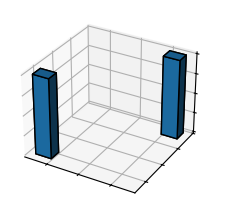

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Dimensões do espaço de voxels
nx, ny, nz = 160, 100, 20

# Cria uma grade de coordenadas
x, y, z = np.indices((nx, ny, nz))

# Criar voxels pequenos: 0.2³ na escala do matplotlib será controlado pelo tamanho do cubo
# Definindo cubos específicos em posições desejadas:
# Exemplo: cubo na posição (10, 11) e (5, 4)
# Note: z varia de 0 a nz-1, então colocamos cubos na camada 0
cube1 = (x == 10) & (y == 11) & (z == 0)
cube2 = (x == 5) & (y == 4) & (z == 0)

# Combina todos os cubos
voxelarray = cube1 | cube2

# Plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Para definir o tamanho real dos "cubos", podemos usar o parâmetro facecolors
ax.voxels(voxelarray, edgecolor='k')

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()


Iniciando sistema de triangulação...



[W912 20:32:33.285327913 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 20:32:33.290686820 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 20:32:33.292532031 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 20:32:33.302838514 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 20:32:33.482408052 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 20:32:33.491715441 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 20:32:33.498468085 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 20:32:33.500893797 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 20:32:33.686624074 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 20:32:33.690733771 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.


0: 480x640 1 person, 12 chairs, 1 dining table, 2 laptops, 1 book, 803.6ms
Speed: 10.1ms preprocess, 803.6ms inference, 38.8ms postprocess per image at shape (1, 3, 480, 640)
Câmera 0: 1 pessoas detectadas



[W912 20:32:34.102382144 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 20:32:34.108509019 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 20:32:34.112162979 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 20:32:34.119485346 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 20:32:34.324690040 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 20:32:34.327594794 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 20:32:34.330909986 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 20:32:34.335250940 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 20:32:34.493473827 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 20:32:34.496234721 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.


0: 480x640 1 person, 9 chairs, 3 dining tables, 615.9ms
Speed: 5.4ms preprocess, 615.9ms inference, 45.3ms postprocess per image at shape (1, 3, 480, 640)
Câmera 1: 1 pessoas detectadas

1 pessoas detectadas:
Pessoa 1: Position(x=10.31, y=7.76, z=2.00)


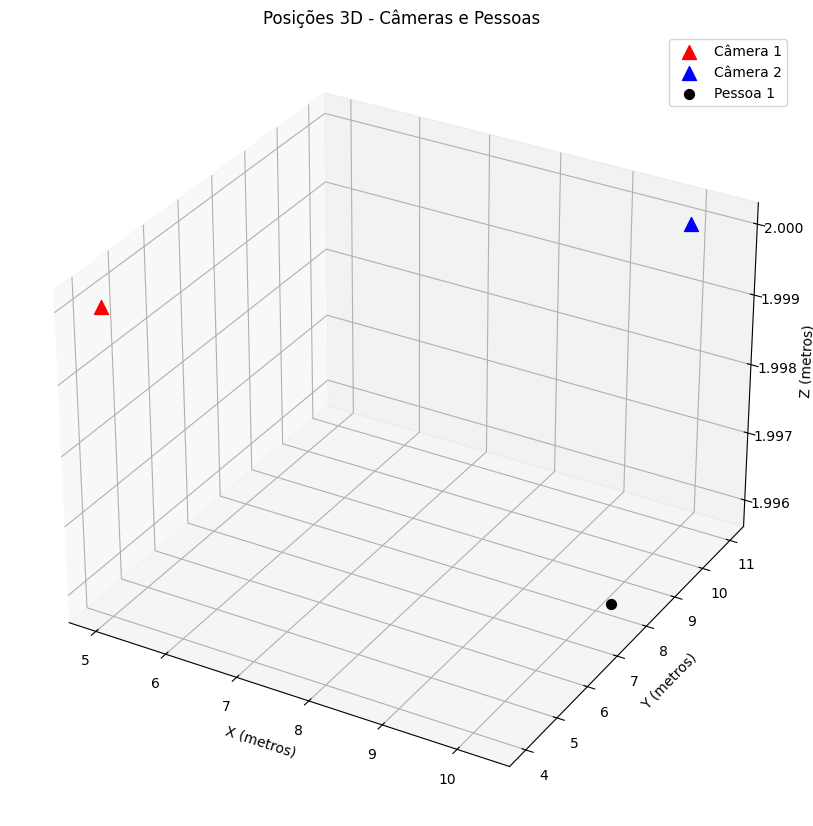

In [ ]:
import numpy as np
import cv2
from ultralytics import YOLO
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class Frame:
    def __init__(self, frame: np.array = None) -> None:
        self.frame = frame
    
    def fromPath(self, path):
        self.frame = cv2.imread(path)
        return self
    
    def get(self):
        return self.frame

class Position:
    def __init__(self, x_axis: float, y_axis: float, z_axis: float, rotation: float, inclination: float) -> None:
        self.x_axis = x_axis
        self.y_axis = y_axis
        self.z_axis = z_axis
        self.rotation = rotation  # em graus
        self.inclination = inclination  # em graus
    
    def __str__(self):
        return f"Position(x={self.x_axis:.2f}, y={self.y_axis:.2f}, z={self.z_axis:.2f})"

class Camera:
    def __init__(self, position: Position, height: float, width: float, model_path: str, fov: float = 60) -> None:
        self.position = position
        self.height = height
        self.width = width
        self.model = YOLO(model_path)
        self.fov = fov  # Field of view em graus
        
        # Calcular parâmetros intrínsecos aproximados
        self.focal_length = self.width / (2 * math.tan(math.radians(self.fov / 2)))
        self.cx = self.width / 2
        self.cy = self.height / 2
    
    def get_results(self, input_frame: Frame):
        result = self.model(input_frame.get())
        
        # Verificar se há detecções
        if result[0].boxes is None or len(result[0].boxes) == 0:
            return {
                'results': result,
                'position': self.position,
                'centroids': []
            }
        
        classes = result[0].boxes.cls.cpu().numpy().astype(int)
        boxes = result[0].boxes.xyxy.cpu().numpy()
        pessoas = []
        
        for idx, box in enumerate(boxes):
            # apenas pessoas (classe 0 no COCO)
            if classes[idx] == 0:
                x1, y1, x2, y2 = map(int, box)
                center_x = int((x1 + x2) / 2)
                center_y = int((y1 + y2) / 2)
                pessoas.append((center_x, center_y))
        
        return {
            'results': result,
            'position': self.position,
            'centroids': pessoas
        }
    
    def pixel_to_ray(self, pixel_x, pixel_y):
        """Converte coordenadas de pixel para um raio 3D no sistema de coordenadas da câmera"""
        # Normalizar coordenadas do pixel
        x_norm = (pixel_x - self.cx) / self.focal_length
        y_norm = (pixel_y - self.cy) / self.focal_length
        
        # Raio no sistema de coordenadas da câmera (Z aponta para frente)
        ray_camera = np.array([x_norm, y_norm, 1.0])
        ray_camera = ray_camera / np.linalg.norm(ray_camera)
        
        # Aplicar rotação da câmera para sistema de coordenadas mundial
        rotation_rad = math.radians(self.position.rotation)
        inclination_rad = math.radians(self.position.inclination)
        
        # Matriz de rotação (simplificada - apenas rotação em Y e X)
        cos_rot = math.cos(rotation_rad)
        sin_rot = math.sin(rotation_rad)
        cos_inc = math.cos(inclination_rad)
        sin_inc = math.sin(inclination_rad)
        
        # Rotação em Y (horizontal)
        rotation_y = np.array([
            [cos_rot, 0, sin_rot],
            [0, 1, 0],
            [-sin_rot, 0, cos_rot]
        ])
        
        # Rotação em X (inclinação)
        rotation_x = np.array([
            [1, 0, 0],
            [0, cos_inc, -sin_inc],
            [0, sin_inc, cos_inc]
        ])
        
        # Aplicar rotações
        ray_world = rotation_y @ rotation_x @ ray_camera
        
        return ray_world

class Environment:
    def __init__(self, cameras: list) -> None:
        self.cameras = cameras
        self.results = None
        self.person_positions = []
    
    def iterate(self):
        """Processar todas as câmeras"""
        print("Processando câmeras...")
        self.results = []
        for i, camera in enumerate(self.cameras):
            # Aqui você precisa fornecer os frames para cada câmera
            # Por simplicidade, vou assumir que os frames são fornecidos externamente
            print(f"Processando câmera {i+1}")
            # result = camera.get_results(frame)
            # self.results.append(result)
    
    def calculate_points(self):
        """Calcular posições 3D das pessoas usando triangulação"""
        if not self.results or len(self.results) < 2:
            print("Necessário pelo menos 2 câmeras com resultados")
            return []
        
        self.person_positions = []
        
        # Para cada pessoa detectada na primeira câmera
        for person1_idx, person1_centroid in enumerate(self.results[0]['centroids']):
            best_position = None
            min_error = float('inf')
            
            # Tentar associar com pessoas detectadas em outras câmeras
            for camera_idx in range(1, len(self.results)):
                for person2_centroid in self.results[camera_idx]['centroids']:
                    # Calcular triangulação entre câmera 0 e câmera atual
                    position = self.triangulate_point(
                        self.cameras[0], person1_centroid,
                        self.cameras[camera_idx], person2_centroid
                    )
                    
                    if position:
                        # Calcular erro de reprojeção (opcional)
                        error = self.calculate_reprojection_error(position, person1_centroid, person2_centroid)
                        if error < min_error:
                            min_error = error
                            best_position = position
            
            if best_position:
                self.person_positions.append(best_position)
        
        return self.person_positions
    
    def triangulate_point(self, camera1, pixel1, camera2, pixel2):
        """Triangular um ponto 3D usando duas câmeras"""
        try:
            # Obter raios das câmeras
            ray1 = camera1.pixel_to_ray(pixel1[0], pixel1[1])
            ray2 = camera2.pixel_to_ray(pixel2[0], pixel2[1])
            
            # Posições das câmeras
            pos1 = np.array([camera1.position.x_axis, camera1.position.y_axis, camera1.position.z_axis])
            pos2 = np.array([camera2.position.x_axis, camera2.position.y_axis, camera2.position.z_axis])
            
            # Resolver o sistema para encontrar o ponto mais próximo entre os dois raios
            # Usando o método de mínimos quadrados
            w = pos1 - pos2
            a = np.dot(ray1, ray1)
            b = np.dot(ray1, ray2)
            c = np.dot(ray2, ray2)
            d = np.dot(ray1, w)
            e = np.dot(ray2, w)
            
            denominator = a * c - b * b
            if abs(denominator) < 1e-10:
                return None  # Raios paralelos
            
            t1 = (b * e - c * d) / denominator
            t2 = (a * e - b * d) / denominator
            
            # Pontos mais próximos nos dois raios
            point1 = pos1 + t1 * ray1
            point2 = pos2 + t2 * ray2
            
            # Ponto médio como estimativa da posição 3D
            triangulated_point = (point1 + point2) / 2
            
            return Position(
                x_axis=triangulated_point[0],
                y_axis=triangulated_point[1],
                z_axis=triangulated_point[2],
                rotation=0,
                inclination=0
            )
            
        except Exception as e:
            print(f"Erro na triangulação: {e}")
            return None
    
    def calculate_reprojection_error(self, position_3d, pixel1, pixel2):
        """Calcular erro de reprojeção (simplificado)"""
        # Distância euclidiana simples - pode ser melhorada
        return np.linalg.norm(np.array(pixel1) - np.array(pixel2))
    
    def plot_3d(self):
        """Visualizar posições 3D das pessoas e câmeras"""
        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')
        
        # Plot câmeras
        camera_colors = ['red', 'blue', 'green', 'orange']
        for i, camera in enumerate(self.cameras):
            ax.scatter(camera.position.x_axis, camera.position.y_axis, camera.position.z_axis, 
                      c=camera_colors[i % len(camera_colors)], marker='^', s=100, 
                      label=f'Câmera {i+1}')
        
        # Plot pessoas
        for i, person_pos in enumerate(self.person_positions):
            ax.scatter(person_pos.x_axis, person_pos.y_axis, person_pos.z_axis, 
                      c='black', marker='o', s=50, label=f'Pessoa {i+1}' if i == 0 else "")
        
        ax.set_xlabel('X (metros)')
        ax.set_ylabel('Y (metros)')
        ax.set_zlabel('Z (metros)')
        ax.legend()
        ax.set_title('Posições 3D - Câmeras e Pessoas')
        plt.show()
    
    def process_frames(self, frames_dict):
        """Processar frames de múltiplas câmeras"""
        self.results = []
        
        for i, camera in enumerate(self.cameras):
            if f'camera_{i}' in frames_dict:
                result = camera.get_results(frames_dict[f'camera_{i}'])
                self.results.append(result)
                print(f"Câmera {i}: {len(result['centroids'])} pessoas detectadas")
        
        # Calcular posições 3D
        positions = self.calculate_points()
        
        return positions

def main():
    print('Iniciando sistema de triangulação...')
    
    # Criar frames
    frame_camera_a = Frame().fromPath('person_teste/cam_a.jpeg')
    frame_camera_b = Frame().fromPath('person_teste/cam_b.jpeg')
    
    # Definir posições das câmeras
    positionA = Position(
        x_axis=5,
        y_axis=4,
        z_axis=2,  # Altura da câmera
        rotation=90,
        inclination=0,
    )
    
    positionB = Position(
        x_axis=10,
        y_axis=11,
        z_axis=2,  # Altura da câmera
        rotation=180,
        inclination=0,
    )
    
    # Criar câmeras
    cameraA = Camera(
        position=positionA,
        height=1200,
        width=1600,  # Corrigir typo 'wight' -> 'width'
        model_path='yolo11n.pt',
        fov=60
    )
    
    cameraB = Camera(
        position=positionB,
        height=1200,
        width=1600,
        model_path='yolo11n.pt',
        fov=60
    )
    
    # Criar ambiente
    environment = Environment(cameras=[cameraA, cameraB])
    
    # Processar frames
    frames_dict = {
        'camera_0': frame_camera_a,
        'camera_1': frame_camera_b
    }
    
    try:
        positions = environment.process_frames(frames_dict)
        
        print(f"\n{len(positions)} pessoas detectadas:")
        for i, pos in enumerate(positions):
            print(f"Pessoa {i+1}: {pos}")
        
        # Visualizar resultados
        if positions:
            environment.plot_3d()
        else:
            print("Nenhuma pessoa foi triangulada com sucesso.")
            
    except Exception as e:
        print(f"Erro durante o processamento: {e}")

if __name__ == "__main__":
    main()

Iniciando sistema de triangulação...


[ WARN:0@5066.583] global loadsave.cpp:275 findDecoder imread_('person_teste/test2camA.jpeg'): can't open/read file: check file path/integrity


WARNING ⚠️ 'source' is missing. Using 'source=/home/angelo/Documentos/Integrador/IA-Materiais/.venv/lib/python3.12/site-packages/ultralytics/assets'.



[W912 21:03:18.796688216 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 21:03:18.799447339 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 21:03:18.801744619 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 21:03:18.803371341 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 21:03:18.947590729 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 21:03:18.951976673 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 21:03:18.960050640 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 21:03:18.962863345 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.


image 1/2 /home/angelo/Documentos/Integrador/IA-Materiais/.venv/lib/python3.12/site-packages/ultralytics/assets/bus.jpg: 640x480 4 persons, 1 bus, 468.1ms


[W912 21:03:18.094323075 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 21:03:18.096559331 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 21:03:18.456613959 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 21:03:18.483829905 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 21:03:18.501556338 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 21:03:18.526808480 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.


image 2/2 /home/angelo/Documentos/Integrador/IA-Materiais/.venv/lib/python3.12/site-packages/ultralytics/assets/zidane.jpg: 384x640 2 persons, 1 tie, 720.0ms
Speed: 3.7ms preprocess, 594.0ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)


[W912 21:03:19.775316100 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 21:03:19.777370530 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 21:03:19.779783978 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 21:03:19.782482173 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 21:03:19.848786160 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 21:03:19.850068700 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 21:03:19.852910739 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 21:03:19.854659111 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.


Câmera 1: 4 pessoas detectadas

0: 288x640 3 persons, 407.0ms
Speed: 5.2ms preprocess, 407.0ms inference, 5.8ms postprocess per image at shape (1, 3, 288, 640)


[W912 21:03:19.302507707 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 21:03:19.304697358 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 21:03:19.306591882 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 21:03:19.308569421 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 21:03:19.376612231 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 21:03:19.378272634 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 21:03:19.380187279 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 21:03:19.381916495 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 21:03:19.436086875 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 21:03:19.437850132 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W912 21:0

Câmera 2: 3 pessoas detectadas

4 pessoas detectadas:
Pessoa 1: Position(x=-0.12, y=2.05, z=3.13)
Pessoa 2: Position(x=-0.39, y=2.09, z=2.62)
Pessoa 3: Position(x=-0.30, y=2.09, z=2.60)
Pessoa 4: Position(x=-0.48, y=2.10, z=2.67)


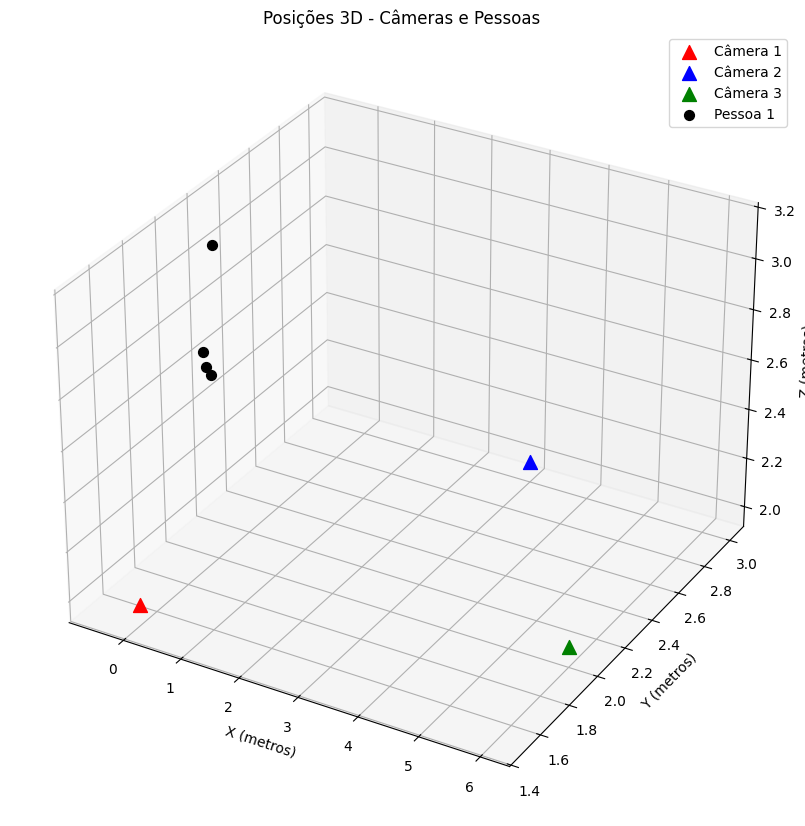

In [16]:
def main():
    print('Iniciando sistema de triangulação...')
    
    # Criar frames
    frame_camera_a = Frame().fromPath('person_teste/test2camA.jpeg')
    frame_camera_b = Frame().fromPath('person_teste/test2camB.jpeg')
    frame_camera_c = Frame().fromPath('person_teste/test2camC.jpeg')
    
    # Definir posições das câmeras
    positionA = Position(
        x_axis=0,
        y_axis=1.5,
        z_axis=2,  # Altura da câmera
        rotation=0,
        inclination=0,
    )
    
    positionB = Position(
        x_axis=3,
        y_axis=3,
        z_axis=2,  # Altura da câmera
        rotation=290,
        inclination=0,
    )

    positionC = Position(
        x_axis=6,
        y_axis=2,
        z_axis=2,  # Altura da câmera
        rotation=190,
        inclination=0,
    )
    
    # Criar câmeras
    cameraA = Camera(
        position=positionA,
        height=1200,
        width=1600,  # Corrigir typo 'wight' -> 'width'
        model_path='yolo11n.pt',
        fov=60
    )
    
    cameraB = Camera(
        position=positionB,
        height=1200,
        width=1600,
        model_path='yolo11n.pt',
        fov=60
    )
    

    cameraC = Camera(
        position=positionC,
        height=1200,
        width=1600,
        model_path='yolo11n.pt',
        fov=60
    )
    # Criar ambiente
    environment = Environment(cameras=[cameraA, cameraB,cameraC])
    
    # Processar frames
    frames_dict = {
        'camera_1': frame_camera_a,
        'camera_2': frame_camera_b,
        'camera_3': frame_camera_c
    }
    
    try:
        positions = environment.process_frames(frames_dict)
        
        print(f"\n{len(positions)} pessoas detectadas:")
        for i, pos in enumerate(positions):
            print(f"Pessoa {i+1}: {pos}")
        
        # Visualizar resultados
        if positions:
            environment.plot_3d()
        else:
            print("Nenhuma pessoa foi triangulada com sucesso.")
            
    except Exception as e:
        print(f"Erro durante o processamento: {e}")

if __name__ == "__main__":
    main()